# Experimenting with portfolio evaluation
### Notebook intended for development, tuning and trial of portfolio evaluation functions
This notebook was used later in development. It was used for iterative development of core portfolio value evolution functionality  
It is not part of the functional sollution.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# import sys
# import os

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))

from config.constants_config import (
    BASE_TICKER_SET,
    BASE_START_DATE,
    BASE_TODAY_DATE,
    BASE_END_DATE,
)

from functions.data_manipulation_functions import (
    load_and_transform_raw_data_full,
    #     load_raw_stocks_data,
    #    transform_raw_stocks_data,
    #     load_raw_bond_yields_data,
    #      join_stocks_bonds,
    #      convert_anualized_rate_to_daily,
)

from functions.data_exploration_functions import get_descriptive_statistics

from functions.portfolio_functions import (
    compute_minimum_variance_portfolio,
)

from functions.portfolio_eval_functions import (
    single_daily_reinvesting_strategy,
    _get_daily_invested_weights,
    multiple_daily_reinvesting_strategy,
    convert_multiple_reinvestment_output_to_df,
    plot_multiple_reinvestment_results,
)

plt.rcParams["figure.figsize"] = [8, 6]

BASE_TICKER_SET = sorted(BASE_TICKER_SET)

### Load and transform data

In [2]:
# comb_df.to_csv('comb_df.csv')
# load_df = pd.read_csv('comb_df.csv', index_col=0)
# load_df

In [3]:
comb_df = load_and_transform_raw_data_full(
    BASE_TICKER_SET, BASE_START_DATE, BASE_END_DATE
)
means, var, covs, corr = get_descriptive_statistics(
    comb_df,
    print_stats=False,
    start_date=BASE_START_DATE,
    end_date=BASE_TODAY_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)

[*********************100%***********************]  8 of 8 completed
c:\Users\stepa\Documents\fit_python\semestral\functions\data_manipulation_functions.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joined_df["daily_riskless_yield"].fillna(


In [4]:
# comb_df.to_csv('comb_df.csv')
# load_df = pd.read_csv('comb_df.csv', index_col=0)
# load_df

## Utilizing defined portfolio strategies for investment

In [5]:
result = single_daily_reinvesting_strategy(
    1000,
    comb_df,
    BASE_TODAY_DATE,
    BASE_START_DATE,
    calc_share_returns_regexp=r"interdaily_pct_change$",
    physical_share_returns_regexp=r"interdaily_pct_change$",
    weights_computation_function=compute_minimum_variance_portfolio,
    reuse_previous_weights=False,
    weight_comp_kwargs={"riskless_rate": 0.0001},
    combine_pure_strat_with_riskless_coef=0.1,
)

In [6]:
# Portfolio weights (must add up to 1)
result[1].sum() + result[2]

1.0

In [7]:
results = multiple_daily_reinvesting_strategy(
    1000,
    comb_df,
    start_est_date=BASE_START_DATE,
    start_trade_date=BASE_TODAY_DATE,
    end_trade_date=BASE_END_DATE,
    wieghts_recalculation_style="daily",
    weights_computation_function=compute_minimum_variance_portfolio,
    combine_pure_strat_with_riskless_coef=0.1,
)

(
    daily_portfolio_values,
    daily_portfolio_share_weights,
    daily_portfolio_riskfree_weights,
    realized_trade_dates,
) = results

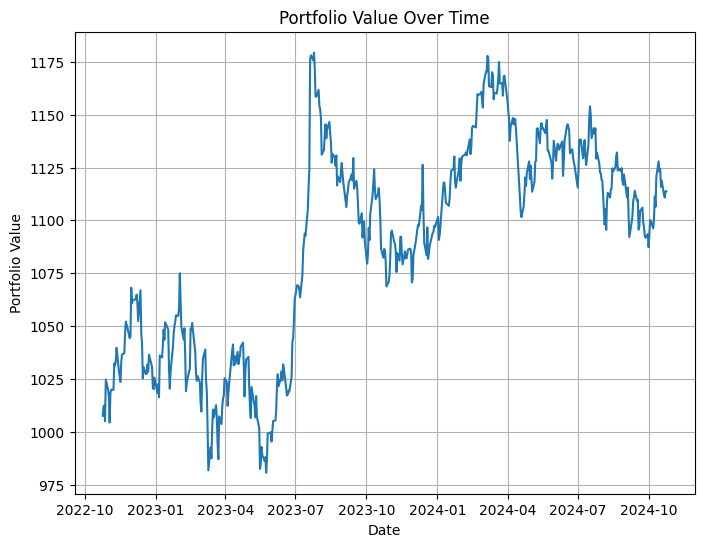

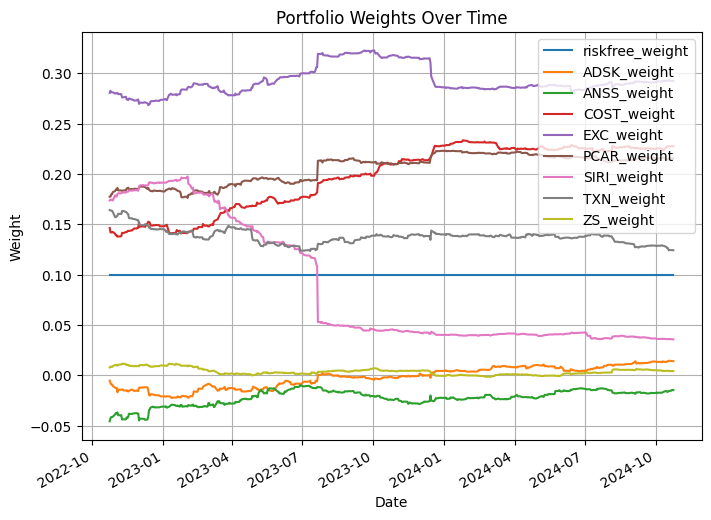

In [8]:
result_df = convert_multiple_reinvestment_output_to_df(
    daily_portfolio_values,
    daily_portfolio_share_weights,
    daily_portfolio_riskfree_weights,
    realized_trade_dates,
    tickers=BASE_TICKER_SET,
)


plot_multiple_reinvestment_results(
    result_df, plot_portfolio_value=True, plot_weights=True
)

In [10]:
daily_portfolio_share_weights

[array([-0.0050874 , -0.04550434,  0.14648856,  0.28064004,  0.17755863,
         0.17372375,  0.16420099,  0.00797977]),
 array([-0.00763459, -0.04251486,  0.14217522,  0.28276948,  0.17767422,
         0.17474841,  0.16396548,  0.00881663]),
 array([-0.00877746, -0.04130514,  0.14203379,  0.28133298,  0.1799047 ,
         0.17449901,  0.1638488 ,  0.00846332]),
 array([-0.00879287, -0.04119061,  0.14202654,  0.28137641,  0.17999536,
         0.17458508,  0.16351882,  0.00848128]),
 array([-0.01046234, -0.0410505 ,  0.14263252,  0.28118428,  0.18215352,
         0.17383441,  0.16232927,  0.00937884]),
 array([-0.01197141, -0.03852981,  0.14073338,  0.2799595 ,  0.18314086,
         0.17900966,  0.15727192,  0.0103859 ]),
 array([-0.01257141, -0.03723157,  0.13921984,  0.28032994,  0.18470452,
         0.17781044,  0.15721093,  0.0105273 ]),
 array([-0.01223602, -0.03771148,  0.13926258,  0.28025187,  0.18465502,
         0.17759579,  0.15811417,  0.01006808]),
 array([-0.01670411, -0.